#1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
import sklearn
sklearn.__version__

'1.1.1'

#2. LOAD DATA

In [3]:
#Load data

main_df = pd.read_excel('Gyalpozhing_household_power_consumption.XLSX')
main_df.head()

,BP Number,BP_name,CA_number,portion,posting_Date,Due Date,Billing Period,Print Doc. No.,Billing Doc. No.,consumption,...,current,voltage,energy_Charges,Demand Charges,Penalty Charges,Recon Key,G/L Account,Category,FICA Doument no,Search term1
0,1702371.0,Company Lemon Grass Factory Kurizampa,50000504.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,167.0,...,1.166136,234.0,589.51,0.0,0.00,19015R040045,300002,LV Agricultural,4.000049e+11,LEMON FACTORY
1,1705727.0,Company RBA Gyelposhing,50001004.0,P17_41,2019-01-02,2019-02-01,2019/01,4.003612e+09,9.018221e+09,788.0,...,5.502486,234.0,2781.64,0.0,0.00,190115R4/17,300002,LV Agricultural,9.434803e+07,"RAMS, GYELPOSHING"
2,1702588.0,N R D C Gyelposhing,60001500.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,N R D C
3,1702586.0,Swerage Treatment Plant,60000307.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,0.0,...,0.000000,234.0,0.00,0.0,0.00,19015R040045,NaN,LV Bulk,4.000049e+11,SWERAGE PLANT
4,1709983.0,Company Rabsel Construction Pvt.Ltd Gyelposhing,60006107.0,P17_41,2019-01-02,2019-02-01,2019/01,6.007099e+09,9.018221e+09,1880.0,...,13.127758,234.0,7557.60,0.0,463.18,19015R040045,300003,LV Bulk,4.000049e+11,RABSEL CONSTRUCTION


# 3. DATA PREPROCESSING 

In [4]:
# Creating a new dataframe with the only required attributes:

df = pd.DataFrame(main_df,columns=['CA_number','BP_name','Category','portion','posting_Date','current','voltage','power','consumption','energy_Charges'])
df.tail()

,CA_number,BP_name,Category,portion,posting_Date,current,voltage,power,consumption,energy_Charges
25377,40067090.0,gyeltshap office,LV Urban Domestic Customers,P17_40,2022-03-02,3.505391,234.0,0.697222,502.0,1207.28
25378,140005001.0,"Company KHPC,Dam Repair Stilling Bagin & Glaci...",MV Industrial,P17_41,2022-03-02,830.316742,234.0,165.150000,118908.0,315106.20
25379,60010803.0,EV Charging Station GCIT Forign Lectural Villa,LV Bulk,P17_41,2022-03-16,0.000000,234.0,0.000000,0.0,0.00
25380,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
25381,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

CA_number         2
BP_name           2
Category          2
portion           2
posting_Date      2
current           2
voltage           2
power             2
consumption       2
energy_Charges    2
dtype: int64

In [6]:
# Selecting the data from 2019 till 2021 only:

df = df.loc[(df['posting_Date'] >= '01-01-2019') & (df['posting_Date'] < '01-01-2022')]
df.tail()

,CA_number,BP_name,Category,portion,posting_Date,current,voltage,power,consumption,energy_Charges
23602,30077784.0,Mr. Tshering Peldon,LV Urban Domestic Customers,P17_41,2021-12-02,0.796045,234.0,0.158333,114.0,165.52
23603,40021115.0,Mr. Chedup Resident,LV Urban Domestic Customers,P17_41,2021-12-02,1.529244,234.0,0.304167,219.0,446.92
23604,40036288.0,Ms. Tashi Choki,LV Urban Domestic Customers,P17_41,2021-12-02,0.628457,234.0,0.125000,90.0,115.20
23605,40021151.0,Mr. Chedup .,LV Urban Domestic Customers,P17_41,2021-12-02,0.733199,234.0,0.145833,105.0,141.40
23606,40061822.0,Company BHU Staffs Quarter -3 Gyelposhing,LV Urban Domestic Customers,P17_41,2021-12-02,0.279314,234.0,0.055556,40.0,51.20


In [7]:
# Extracting the year and montht from the posting_date
# Adding these two new columns(Year and month) and then droping the posting date col

df['Year'] = pd.to_datetime(df['posting_Date']).dt.year
df['Month'] = pd.to_datetime(df['posting_Date']).dt.month
df = df.drop(['posting_Date'], axis = 1)

In [8]:
df.dtypes

CA_number         float64
BP_name            object
Category           object
portion            object
current           float64
voltage           float64
power             float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

In [9]:
df['CA_number'] = df['CA_number'].astype(int)

In [10]:
df

,CA_number,BP_name,Category,portion,current,voltage,power,consumption,energy_Charges,Year,Month
0,50000504,Company Lemon Grass Factory Kurizampa,LV Agricultural,P17_41,1.166136,234.0,0.231944,167.0,589.51,2019,1
1,50001004,Company RBA Gyelposhing,LV Agricultural,P17_41,5.502486,234.0,1.094444,788.0,2781.64,2019,1
2,60001500,N R D C Gyelposhing,LV Bulk,P17_41,0.000000,234.0,0.000000,0.0,0.00,2019,1
3,60000307,Swerage Treatment Plant,LV Bulk,P17_41,0.000000,234.0,0.000000,0.0,0.00,2019,1
4,60006107,Company Rabsel Construction Pvt.Ltd Gyelposhing,LV Bulk,P17_41,13.127758,234.0,2.611111,1880.0,7557.60,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
23602,30077784,Mr. Tshering Peldon,LV Urban Domestic Customers,P17_41,0.796045,234.0,0.158333,114.0,165.52,2021,12
23603,40021115,Mr. Chedup Resident,LV Urban Domestic Customers,P17_41,1.529244,234.0,0.304167,219.0,446.92,2021,12
23604,40036288,Ms. Tashi Choki,LV Urban Domestic Customers,P17_41,0.628457,234.0,0.125000,90.0,115.20,2021,12
23605,40021151,Mr. Chedup .,LV Urban Domestic Customers,P17_41,0.733199,234.0,0.145833,105.0,141.40,2021,12


In [11]:
gyalpozhing_df = df.drop_duplicates()

In [12]:
df.shape

(23607, 11)

# 4. DETECTING OUTLIERS

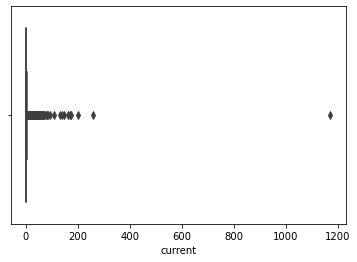

In [13]:
sns.boxplot(x = gyalpozhing_df['current'])
plt.show()

In [14]:
#ul = upper limit
#ll = lower limit
#IQR = Interquartile Range

q1 = gyalpozhing_df.current.quantile(0.25)
q3 = gyalpozhing_df.current.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [15]:
gyalpozhing_df[(gyalpozhing_df.current < ll)  | (gyalpozhing_df.current > ul)]

,CA_number,BP_name,Category,portion,current,voltage,power,consumption,energy_Charges,Year,Month
1,50001004,Company RBA Gyelposhing,LV Agricultural,P17_41,5.502486,234.0,1.094444,788.0,2781.64,2019,1
4,60006107,Company Rabsel Construction Pvt.Ltd Gyelposhing,LV Bulk,P17_41,13.127758,234.0,2.611111,1880.0,7557.60,2019,1
5,60006105,Company Gyelposhing AstroTurf Foodball Ground ...,LV Bulk,P17_41,48.600637,234.0,9.666667,6960.0,27979.20,2019,1
7,60000306,Company KCT Block AGGREGATE,LV Bulk,P17_41,7.262164,234.0,1.444444,1040.0,4180.80,2019,1
8,60000305,Collage Adm Block,LV Bulk,P17_41,10.048321,234.0,1.998611,1439.0,5784.78,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
23523,40058650,"Company President Quater, Gyelposhing College",LV Urban Domestic Customers,P17_41,5.816714,234.0,1.156944,833.0,2412.12,2021,12
23537,70004786,Mr. Sonam Yeshi,LV Urban Domestic Customers,P17_41,3.233060,234.0,0.643056,463.0,1100.84,2021,12
23583,40085315,Company HRH Gyaltshab Staff Qtr-A6 Gyelpozhing...,LV Urban Domestic Customers,P17_41,7.422770,234.0,1.476389,1063.0,3249.32,2021,12
23584,40085314,Company HRH Gyaltshab Staff Qtr-A5 Gyelpozhing...,LV Urban Domestic Customers,P17_41,8.100106,234.0,1.611111,1160.0,3602.40,2021,12


In [16]:
df1 = gyalpozhing_df[(gyalpozhing_df.current > ll) & (gyalpozhing_df.current < ul)]
df1.shape

(21646, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

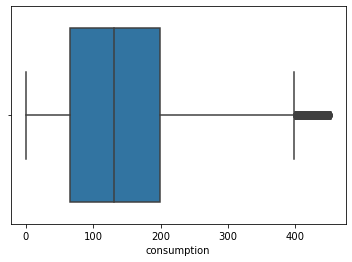

In [17]:
sns.boxplot(x = df1['consumption'])
plt.show

In [18]:
q1 = df1.consumption.quantile(0.25)
q3 = df1.consumption.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [19]:
df1[(df1.consumption < ll)  | (df1.consumption > ul)]

,CA_number,BP_name,Category,portion,current,voltage,power,consumption,energy_Charges,Year,Month
15,70019802,Mr. Sangay Tenzin,LV Commercial,P17_41,3.037540,234.0,0.604167,435.0,1535.55,2019,1
25,70004740,Ms. Tshering Yangdon,LV Commercial,P17_41,2.953746,234.0,0.587500,423.0,1493.19,2019,1
31,40021057,Mr. Pema Lhamo,LV Commercial,P17_41,2.918831,234.0,0.580556,418.0,1475.54,2019,1
41,70004766,Mr. Dorji .,LV Commercial,P17_41,2.890900,234.0,0.575000,414.0,1461.42,2019,1
45,70004777,Mr. Tashi Choki,LV Commercial,P17_41,2.800123,234.0,0.556944,401.0,1415.53,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
23163,130018748,"Mr. Bhutan Construction,PVT.LTD,Thimphu .",LV Temporary,P17_41,3.100385,234.0,0.616667,444.0,1616.16,2021,12
23298,40067757,Company Choney Dorji I Upper Coloney KHPC,LV Urban Domestic Customers,P17_40,2.807106,234.0,0.558333,402.0,937.36,2021,12
23306,40067751,Company Tshonglay Dendup Upper Coloney KHPC,LV Urban Domestic Customers,P17_40,3.079437,234.0,0.612500,441.0,1041.88,2021,12
23316,120000303,Company Rbp NCO's Residence,LV Urban Domestic Customers,P17_41,2.925814,234.0,0.581944,419.0,982.92,2021,12


In [20]:
df2 = df1[(df1.consumption > ll) & (df1.consumption < ul)]
df2.shape

(21303, 11)

<function matplotlib.pyplot.show(close=None, block=None)>

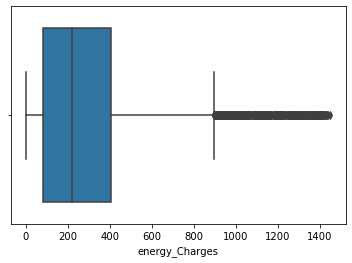

In [21]:
sns.boxplot(x = df2['energy_Charges'])
plt.show

In [22]:
q1 = df2.energy_Charges.quantile(0.25)
q3 = df2.energy_Charges.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [23]:
df2[(df2.energy_Charges < ll)  | (df2.energy_Charges > ul)]

,CA_number,BP_name,Category,portion,current,voltage,power,consumption,energy_Charges,Year,Month
13,40036882,Ms. Rinchen Zangmo,LV Commercial,P17_41,1.871404,234.0,0.372222,268.0,946.04,2019,1
30,40021052,Ms. Sangay Dema,LV Commercial,P17_41,1.913301,234.0,0.380556,274.0,967.22,2019,1
50,40021095,Mr. Kinzang Penjore,LV Commercial,P17_41,1.885370,234.0,0.375000,270.0,953.10,2019,1
55,70004780,Ms. Seldon .,LV Commercial,P17_41,2.115804,234.0,0.420833,303.0,1069.59,2019,1
63,40021109,Ms. Choden .,LV Commercial,P17_41,2.325289,234.0,0.462500,333.0,1175.49,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
23102,100002398,Company Range Office Gyelposhing,LV Institutional,P17_41,1.927267,234.0,0.383333,276.0,1004.64,2021,12
23113,130019467,Ms. Adm. Block,LV Institutional,P17_41,2.590637,234.0,0.515278,371.0,1350.44,2021,12
23150,130019845,Mr. Kharsa Constraction Pvt Ltd Gyelposhing,LV Temporary,P17_41,2.234512,234.0,0.444444,320.0,1164.80,2021,12
23151,130030482,Company Hope-Gyelposhing Project Forcign facul...,LV Temporary,P17_41,2.667449,234.0,0.530556,382.0,1390.48,2021,12


In [24]:
df3 = df2[(df2.energy_Charges > ll) & (df2.energy_Charges < ul)]
df3.shape

(20598, 11)

# 6. LABEL ENCODING

In [25]:
df3.tail()

,CA_number,BP_name,Category,portion,current,voltage,power,consumption,energy_Charges,Year,Month
23602,30077784,Mr. Tshering Peldon,LV Urban Domestic Customers,P17_41,0.796045,234.0,0.158333,114.0,165.52,2021,12
23603,40021115,Mr. Chedup Resident,LV Urban Domestic Customers,P17_41,1.529244,234.0,0.304167,219.0,446.92,2021,12
23604,40036288,Ms. Tashi Choki,LV Urban Domestic Customers,P17_41,0.628457,234.0,0.125000,90.0,115.20,2021,12
23605,40021151,Mr. Chedup .,LV Urban Domestic Customers,P17_41,0.733199,234.0,0.145833,105.0,141.40,2021,12
23606,40061822,Company BHU Staffs Quarter -3 Gyelposhing,LV Urban Domestic Customers,P17_41,0.279314,234.0,0.055556,40.0,51.20,2021,12


In [26]:
df

,CA_number,BP_name,Category,portion,current,voltage,power,consumption,energy_Charges,Year,Month
0,50000504,Company Lemon Grass Factory Kurizampa,LV Agricultural,P17_41,1.166136,234.0,0.231944,167.0,589.51,2019,1
1,50001004,Company RBA Gyelposhing,LV Agricultural,P17_41,5.502486,234.0,1.094444,788.0,2781.64,2019,1
2,60001500,N R D C Gyelposhing,LV Bulk,P17_41,0.000000,234.0,0.000000,0.0,0.00,2019,1
3,60000307,Swerage Treatment Plant,LV Bulk,P17_41,0.000000,234.0,0.000000,0.0,0.00,2019,1
4,60006107,Company Rabsel Construction Pvt.Ltd Gyelposhing,LV Bulk,P17_41,13.127758,234.0,2.611111,1880.0,7557.60,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
23602,30077784,Mr. Tshering Peldon,LV Urban Domestic Customers,P17_41,0.796045,234.0,0.158333,114.0,165.52,2021,12
23603,40021115,Mr. Chedup Resident,LV Urban Domestic Customers,P17_41,1.529244,234.0,0.304167,219.0,446.92,2021,12
23604,40036288,Ms. Tashi Choki,LV Urban Domestic Customers,P17_41,0.628457,234.0,0.125000,90.0,115.20,2021,12
23605,40021151,Mr. Chedup .,LV Urban Domestic Customers,P17_41,0.733199,234.0,0.145833,105.0,141.40,2021,12


In [27]:
# unique values in each columns
for x in df3.columns:
    #prinfting unique values
    print(x ,':', len(df3[x].unique()))

CA_number : 738
BP_name : 676
Category : 12
portion : 2
current : 1759
voltage : 1
power : 1759
consumption : 1759
energy_Charges : 2935
Year : 3
Month : 12


In [28]:
df3['Category'].value_counts()

LV Urban Domestic Customers             15578
LV Rural Domestic Customers              1690
LV Commercial                            1289
LV Institutional                          964
LV Temporary                              412
LV Rural-Community Lhakhangs              225
LV Religious Institution customers        164
LV Bulk                                   132
LV Street light                            57
LV Agricultural                            32
LV Power house                             30
LV Rural-cooperativs and Agriculture       25
Name: Category, dtype: int64

In [29]:
df3.Category.unique()

array(['LV Agricultural', 'LV Bulk', 'LV Commercial', 'LV Institutional',
       'LV Power house', 'LV Religious Institution customers',
       'LV Rural Domestic Customers', 'LV Rural-Community Lhakhangs',
       'LV Street light', 'LV Temporary', 'LV Urban Domestic Customers',
       'LV Rural-cooperativs and Agriculture'], dtype=object)

# 7. TRAIN AND TEST SPLIT




In [30]:
# Input:
X = df3[['Year','Month','current','voltage','Category','portion']]

# Output:
y = df3[['consumption']]

In [31]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0, 1))
# X_scaled = sc.fit_transform(x)

In [32]:
#SPLITING

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [33]:
 #Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [34]:
X_test.head()

,Year,Month,current,voltage,Category,portion
15553,2021,1,1.089325,234.0,LV Urban Domestic Customers,P17_40
9282,2020,4,0.614491,234.0,LV Urban Domestic Customers,P17_40
23560,2021,12,0.335177,234.0,LV Urban Domestic Customers,P17_41
7934,2020,2,2.318306,234.0,LV Urban Domestic Customers,P17_41
19745,2021,7,0.411988,234.0,LV Institutional,P17_41


In [35]:
y_test.head()

,consumption
15553,156.0
9282,88.0
23560,48.0
7934,332.0
19745,59.0


In [36]:
#Separate the Categorical and Numerical Columns
#Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

#categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Year', 'Month', 'current', 'voltage'], dtype='object')
Index(['Category', 'portion'], dtype='object')


In [37]:
numeric_index = [X.columns.get_loc(col) for col in numeric_cols]
numeric_index

[0, 1, 2, 3]

In [38]:
categorical_index = [X.columns.get_loc(col) for col in categorical_cols]
categorical_index

[4, 5]

In [39]:
 #Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='mean')), #Handline numeric missing value with median
    ('scaler',StandardScaler()) #Normalize the data
] )


In [40]:
#Building the Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [41]:
 #Combine the numeric and categorical transformers
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [('num',numeric_transformer,numeric_index),
                ('nominal',categorical_transformer,categorical_index),]
)

In [42]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [43]:
#Assemble the individual blocks to form the main pipeline
testmodel = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('regressor'  , LR_model)  #Model
    ]
)

In [44]:
#Training the model using pipeline
# Display Pipeline
# from sklearn import set_config
# set_config(display='diagram')
#fit data
testmodel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3]),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [4, 5])])),
                ('regressor', LinearRegression())])

In [45]:
import pickle
pickle.dump(testmodel, open("testmodel.sav","wb"))

In [46]:
pmodel = pickle.load(open("testmodel.sav","rb"))
pmodel

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3]),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [4, 5])])),
                ('regressor', LinearRegression())])

In [58]:
X.columns

Index(['Year', 'Month', 'current', 'voltage', 'Category', 'portion'], dtype='object')

In [63]:
arr = np.array(arr).reshape(1,-1)

In [64]:
f_df = pd.DataFrame(data=arr,
                    columns=['Year', 'Month', 'current', 'voltage', 'Category', 'portion'])

In [65]:
pmodel.predict(f_df)

array([[167.00000429]])

In [54]:
X.head()

,Year,Month,current,voltage,Category,portion
0,2019,1,1.166136,234.0,LV Agricultural,P17_41
2,2019,1,0.000000,234.0,LV Bulk,P17_41
3,2019,1,0.000000,234.0,LV Bulk,P17_41
6,2019,1,0.000000,234.0,LV Bulk,P17_41
10,2019,1,0.775096,234.0,LV Commercial,P17_41


In [ ]:
print('\n\nResults of Linear Regression:\n')
print("Train set accuracy of regression model: ",r2_score(y_train,Y_train_predicted_LR))
print("Test set accuracy of regression model: ",r2_score(y_test,Y_test_predicted_LR))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_LR))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_LR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))
print('\nConclusion: High accuracy and errors')

In [47]:
 #save Model with sklearn joblib
from joblib import load, dump
dump(testmodel,'loanmodeljob.sav')

['loanmodeljob.sav']

In [48]:
model = load('loanmodeljob.sav')

In [ ]:
import pickle
pmodel = pickle.load(open("testmodel.sav","rb"))
pmodel

In [49]:
model.predict([[2019,1,1.166136,234.0,0,1]])

C:\Users\TashiN\anaconda2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\TashiN\anaconda2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[167.00000429]])

In [50]:
pmodel.predict([[2019,1,1.166136,234.0,0,1]])

C:\Users\TashiN\anaconda2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\TashiN\anaconda2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[167.00000429]])


**CONCLUSION :**

From all the above result we can conclude that the best algorithm is the Random Forest Algorithm for this project because it has higher accuracy and low Mean Absolute Error, Mean Squared Error and Root Mean Squared Error compared to other algorithm.